In [2]:
import numpy as np
import matplotlib.pyplot as plt
import starry

import exoplanet as exo


In [3]:
starry.__version__

'1.0.0.dev3'

In [4]:
map = starry.Map(ydeg=20, udeg=2, rv=True, lazy=False)


In [5]:
time, vels, verr = np.loadtxt('../data/transit.vels', usecols=[0,1,2], unpack=True)
time -= 2458706.5

In [6]:
Prot = 2.85             # days
P = 8.1387              # days
t0 = 0.168
e = 0.0                   
w = 0.0
inc = 90.0


vsini = 18.3 * 1e3      # m /s
r = 0.06472             # In units of Rstar
b = -0.40               # I want it to transit in the South!
a = 19.42               # In units of Rstar
u1 = 0.95
u2 = 0.20
obl = -0
gamma = -15
gammadot = 100
gammadotdot = 800

veq = vsini / np.sin(inc * np.pi / 180.0)



Compiling `rv`... Done.
/home/bmontet/anaconda3/envs/p35/lib/python3.5/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


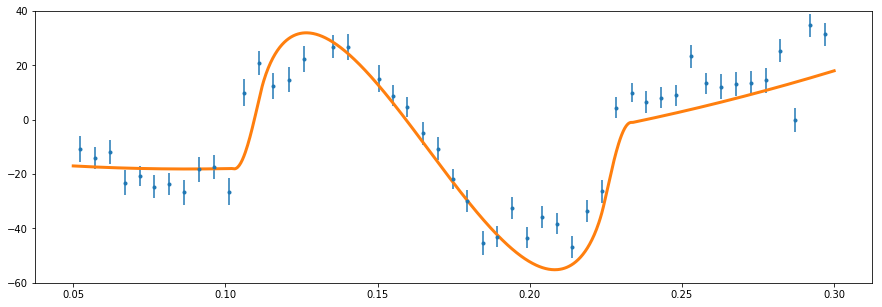

In [7]:
map.reset()
map.inc = inc
map.obl = obl
#map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
map[1:] = [u1, u2]
map.veq = veq

orbit = exo.orbits.KeplerianOrbit(period=P, a=a, t0=t0, b=b, ecc=e, omega=w, r_star=1.0) 


t = np.linspace(0.05, 0.30, 1000)


f = (t - t0)/P*2*np.pi
I = np.arccos(b/a)

zo = a*np.cos(f) 
yo = -a*np.sin(np.pi/2+f)*np.cos(I)
xo = a*np.sin(f)*np.sin(I)


theta = 360.0 / Prot * t

rv = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
rv += gamma + gammadot*(t-0.15) + gammadotdot*(t-0.15)**2
    

plt.figure(figsize=(15,5))
plt.plot(t, rv, "C1", lw=3)
plt.errorbar(time, vels, yerr=verr, fmt='.')
plt.ylim(-60, 40);

Compiling `render`... Done.


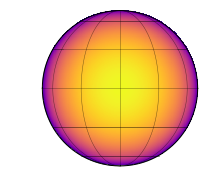

In [8]:
map.show(rv=False)

In [9]:
from scipy.optimize import minimize

In [136]:
tuse = time + 0.0
euse = verr + 0.0
vuse = vels + 0.0


def rmcurve(params):
    
    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, jitter_good, jitter_bad, q, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.reset()

    map.inc = inc
    map.obl = obl
    #map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq


    f = (tuse - t0)/P*2*np.pi
    I = np.arccos(b/a)

    zo = a*np.cos(f) 
    yo = -a*np.sin(np.pi/2+f)*np.cos(I)
    xo = a*np.sin(f)*np.sin(I)


    theta = 360.0 / Prot * tuse

    rv_0 = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    rv = rv_0 + 0.0#gamma + gammadot*(tuse-0.15) + gammadotdot*(tuse-0.15)**2
    
    
    var_good = (euse**2 + jitter_good**2)
    var_bad  = (euse**2 + jitter_bad**2)
   
    goodgauss = q * np.sqrt(2*np.pi*var_good) * np.exp(-(rv-vuse)**2/var_good)
    badgauss  = (1-q) * np.sqrt(2*np.pi*var_bad) * np.exp(-(rv_0*0.75-vuse)**2/var_bad)

    totgauss = np.log(goodgauss + badgauss)
    
    print(totgauss)
        
    print(-1*np.sum(totgauss))
    return -1*np.sum(totgauss)



In [112]:
def plot_rmcurve(params):

    vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, jitter_good, jitter_bad, q, t0 = params
    veq = vsini / np.sin(inc * np.pi / 180.0)

    map.reset()

    map.inc = inc
    map.obl = obl
    #map.add_spot(spot_amp, sigma=spot_sig, lon=spot_lon, lat=-spot_lat)
    map[1:] = [u1, u2]
    map.veq = veq


    f = (t - t0)/P*2*np.pi
    I = np.arccos(b/a)

    zo = a*np.cos(f) 
    yo = -a*np.sin(np.pi/2+f)*np.cos(I)
    xo = a*np.sin(f)*np.sin(I)

    theta = 360.0 / Prot * t

    rv = map.rv(xo=xo, yo=yo, zo=zo, ro=r, theta=theta)
    rv += gamma + gammadot*(t-0.15) + gammadotdot*(t-0.15)**2

    plt.figure(figsize=(15,5))
    plt.plot(t, rv, "C1", lw=3)
    plt.errorbar(time, vels, yerr=verr, fmt='.')
    plt.ylim(-50, 40);
    plt.show()


[-1.58316300e+00 -5.79810986e+00 -2.98343404e+00 -1.34999618e+01
 -1.58355387e+01 -1.73512842e+01 -1.87682873e+01 -1.82855504e+01
 -7.98325393e+00 -7.35649244e+00 -1.62450620e+01 -3.33918611e+00
 -1.73986221e+01 -5.28963973e+01 -5.63449582e+01 -2.83627202e+01
 -1.26804438e+01 -3.64090319e+00 -2.06427896e+00 -4.23544142e+00
 -1.32466297e+00 -1.35245031e+00  4.83250536e-01 -6.51295091e-01
 -4.10746209e-02 -1.91924647e+00  6.58813164e-01 -6.45862411e-02
  2.04339568e+00 -4.62712593e+00 -4.01653962e+00  2.05865957e+00
 -2.81720177e+00  2.04409182e-01 -6.66086750e+00 -3.79248669e+00
 -1.23717202e-01 -1.61993825e+00 -1.83453928e+00 -1.69985889e+01
 -5.59958341e+00 -3.00918406e+00 -4.27181222e+00 -4.21579416e+00
 -5.03077476e+00 -1.92210411e+01  2.41408730e+00 -3.74005312e+01
 -3.01637219e+01]
455.54723724279023


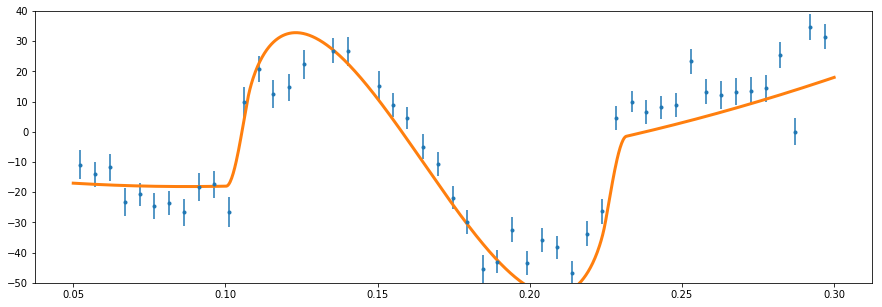

In [141]:
inputs = np.array([19300, 0.0588, -0.09, 20.79, 1.0, 0.00, 10.0, -15.0, 100.1, 800.0, 0.0, 0.0, 0.8, 0.166])

bnds = ((12000, 24000), (0.04, 0.07), (-1.0, 0.0), (15,25), (0,1),(0,1), (-30,90), (-20,20),(50,300), (700, 900), (0.0, 0.1), (0.0, 0.1), (0.7, 1.0), (0.16, 0.175))
rmcurve(inputs)

plot_rmcurve(inputs)

In [142]:
res = minimize(rmcurve, inputs, method='L-BFGS-B', bounds=bnds)

[-1.58316300e+00 -5.79810986e+00 -2.98343404e+00 -1.34999618e+01
 -1.58355387e+01 -1.73512842e+01 -1.87682873e+01 -1.82855504e+01
 -7.98325393e+00 -7.35649244e+00 -1.62450620e+01 -3.33918611e+00
 -1.73986221e+01 -5.28963973e+01 -5.63449582e+01 -2.83627202e+01
 -1.26804438e+01 -3.64090319e+00 -2.06427896e+00 -4.23544142e+00
 -1.32466297e+00 -1.35245031e+00  4.83250536e-01 -6.51295091e-01
 -4.10746209e-02 -1.91924647e+00  6.58813164e-01 -6.45862411e-02
  2.04339568e+00 -4.62712593e+00 -4.01653962e+00  2.05865957e+00
 -2.81720177e+00  2.04409182e-01 -6.66086750e+00 -3.79248669e+00
 -1.23717202e-01 -1.61993825e+00 -1.83453928e+00 -1.69985889e+01
 -5.59958341e+00 -3.00918406e+00 -4.27181222e+00 -4.21579416e+00
 -5.03077476e+00 -1.92210411e+01  2.41408730e+00 -3.74005312e+01
 -3.01637219e+01]
455.54723724279023
[-1.58316300e+00 -5.79810986e+00 -2.98343404e+00 -1.34999618e+01
 -1.58355387e+01 -1.73512842e+01 -1.87682873e+01 -1.82855504e+01
 -7.98325393e+00 -7.35649244e+00 -1.62450620e+01 -3.3

[-1.58316300e+00 -5.79810986e+00 -2.98343404e+00 -1.34999618e+01
 -1.58355387e+01 -1.73512842e+01 -1.87682873e+01 -1.82855504e+01
 -7.98325393e+00 -7.35649244e+00 -1.62450620e+01 -3.33918611e+00
 -1.73986221e+01 -5.28963973e+01 -5.63449582e+01 -2.83627202e+01
 -1.26804438e+01 -3.64090319e+00 -2.06427896e+00 -4.23544142e+00
 -1.32466297e+00 -1.35245031e+00  4.83250536e-01 -6.51295091e-01
 -4.10746209e-02 -1.91924647e+00  6.58813164e-01 -6.45862411e-02
  2.04339568e+00 -4.62712593e+00 -4.01653962e+00  2.05865957e+00
 -2.81720177e+00  2.04409182e-01 -6.66086750e+00 -3.79248669e+00
 -1.23717202e-01 -1.61993825e+00 -1.83453928e+00 -1.69985889e+01
 -5.59958341e+00 -3.00918406e+00 -4.27181222e+00 -4.21579416e+00
 -5.03077476e+00 -1.92210411e+01  2.41408730e+00 -3.74005312e+01
 -3.01637219e+01]
455.54723724279023
[-1.58316303e+00 -5.79810991e+00 -2.98343408e+00 -1.34999619e+01
 -1.58355388e+01 -1.73512843e+01 -1.87682873e+01 -1.82855505e+01
 -7.98325398e+00 -7.35649249e+00 -1.62450621e+01 -3.3

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.95386524e+00 -1.46614907e+01 -5.65522251e-01
 -1.12422298e+01 -2.60848213e+00 -4.48865444e+00 -1.03877496e+01
 -2.12479879e+01 -1.62219812e+01 -7.32587996e+00 -6.30764597e+00
 -1.60325062e+00  1.77646165e+00 -2.51736487e+00 -1.76491397e+01
 -3.17711054e+01 -5.46742857e+01 -6.76268588e+01 -3.53879744e+01
 -6.84860733e+01 -4.44408163e+01 -5.43427500e+01 -7.96110532e+01
 -3.77311313e+01 -2.08494648e+01  1.24914166e+00 -3.43373952e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
840.6672322203069
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.95386524e+00 -1.46614907e+01 -5.65

[ -1.53266788  -5.71983288  -2.91803455 -13.41937543 -15.75494778
 -17.27069255 -18.6876954  -18.20495858  -7.90306481  -7.27655896
 -14.9863587    0.90301537   1.174883   -27.79019384 -37.7843741
 -19.33603966  -8.75540445  -2.0636976   -1.56938049  -4.02164028
  -1.60516674  -1.99180954  -0.22685001  -1.78989165  -1.21372911
  -4.24214584   0.15369577   1.89869678   0.22609724   1.22738398
   1.98551367   0.74967226   0.7098849  -14.09252571   1.19836682
  -3.72255383  -0.09691786  -1.57240977  -1.7833116  -16.91799728
  -5.5217543   -2.94333957  -4.19790189  -4.14203978  -4.95403364
 -19.14044915   2.4140873  -37.31993919 -30.08312994]
369.91151724993534
[ -1.53266788  -5.71983288  -2.91803455 -13.41937543 -15.75494778
 -17.27069255 -18.6876954  -18.20495858  -7.90306481  -7.27655896
 -14.9863587    0.90301548   1.17488286 -27.79019405 -37.78437406
 -19.33603953  -8.75540431  -2.06369752  -1.56938044  -4.02164022
  -1.60516672  -1.99180953  -0.22685001  -1.78989167  -1.21372915
  -4

[-1.55204660e+00 -5.74961750e+00 -2.94301829e+00 -1.34500169e+01
 -1.57855910e+01 -1.73013360e+01 -1.87183389e+01 -1.82356021e+01
 -7.93355899e+00 -7.30695833e+00 -1.50170017e+01  2.16907382e+00
  6.79761401e-01 -2.01971267e+01 -2.41361929e+01 -9.07493937e+00
 -1.31580572e+00  1.42434009e+00  8.85556965e-01 -9.46690638e-01
  3.28725113e-02 -1.42391915e+00 -6.07920868e-01 -3.35341721e+00
 -3.52876912e+00 -8.39228724e+00 -2.74441904e+00  1.57981457e+00
  7.20699142e-01  2.00434941e+00  1.48556094e+00  5.38756353e-01
  8.73982173e-01 -1.99563824e+00  1.21396989e+00 -3.74923209e+00
 -1.07277833e-01 -1.59066661e+00 -1.80296703e+00 -1.69486407e+01
 -5.55137260e+00 -2.96848986e+00 -4.22606291e+00 -4.17014274e+00
 -4.98324771e+00 -1.91710927e+01  2.41408730e+00 -3.73505828e+01
 -3.01137735e+01]
318.42093707770186
[-1.55204660e+00 -5.74961750e+00 -2.94301829e+00 -1.34500169e+01
 -1.57855910e+01 -1.73013360e+01 -1.87183389e+01 -1.82356021e+01
 -7.93355899e+00 -7.30695833e+00 -1.50170017e+01  2.1

[ -1.60095877  -5.82623098  -3.00672019 -13.52895915 -15.86453776
 -17.38028356 -18.79728667 -18.31454981  -8.01210031  -7.38524175
 -29.45400936  -3.9077308   -0.28124584 -11.6234442   -9.17977716
   0.37436792   1.91465521   1.51730914   2.32748077   2.22722908
   2.18430632   1.46691305   1.08130397  -2.19453933  -3.78474868
 -10.8690539   -6.25305013   0.78390783  -0.91736653   0.63179762
   0.58762669  -2.11432091   0.72762422   0.24208714   0.70137236
  -3.81746518  -0.13301052  -1.63665448  -1.85260231 -17.02758814
  -5.62753493  -3.03263587  -4.29828423  -4.24220746  -5.05831472
 -19.25004047   2.4140873  -37.42953061 -30.19272135]
304.712677455617
[ -1.60095877  -5.82623098  -3.00672019 -13.52895915 -15.86453776
 -17.38028356 -18.79728667 -18.31454981  -8.01210031  -7.38524175
 -29.45400936  -3.9077308   -0.28124584 -11.6234442   -9.17977716
   0.37436792   1.91465521   1.51730914   2.32748077   2.22722908
   2.18430632   1.46691305   1.08130397  -2.19453933  -3.78474868
 -10.

[ -1.58911621  -5.80748496  -2.99120974 -13.50962622 -15.84520368
 -17.36094929 -18.77795235 -18.2952155   -7.9928685   -7.36607497
 -15.65229466   1.14327028   1.30907172  -9.92351999  -9.14946588
  -0.04113269   2.13460483   1.89944505   2.43630999   1.91150271
   1.92200251   0.16189694  -0.25582871  -4.47646539  -6.32436973
 -13.9635316   -8.8309438    0.69909171  -1.81591353   0.67425547
   0.64739718  -2.13180461   0.77372521   0.94637748  -1.47201469
  -3.80082281  -0.12683489  -1.62553233  -1.84058137 -17.0082539
  -5.60890249  -3.01701465  -4.28064238  -4.2246049   -5.03995789
 -19.23070615   2.4140873  -37.41019626 -30.17338701]
297.8873853333935
[ -1.58911621  -5.80748496  -2.99120974 -13.50962622 -15.84520368
 -17.36094929 -18.77795235 -18.2952155   -7.9928685   -7.36607497
 -15.65229466   1.14327028   1.30907172  -9.92351999  -9.14946588
  -0.04113269   2.13460483   1.89944505   2.43630999   1.91150271
   1.92200251   0.16189694  -0.25582871  -4.47646539  -6.32436973
 -13.

[ -1.57651489  -5.78767811  -2.97476738 -13.48921146 -15.82478772
 -17.34053313 -18.75753614 -18.2747993   -7.97255841  -7.34583221
 -15.44878876   1.31939628   1.0620955  -11.3334667  -10.79436881
  -0.78031389   2.16414124   2.03314948   2.42138432   1.87091187
   1.94211628   0.36117023   0.08423982  -3.68071031  -5.22933248
 -12.36393737  -7.2358919    0.79868693  -1.05463784   0.65861226
   0.6329082   -2.24110564   0.71034119  -0.5541765    0.97507423
  -3.78320089  -0.12022516  -1.61368883  -1.82779257 -16.98783777
  -5.58921338  -3.00045674  -4.26198119  -4.20598455  -5.02055456
 -19.21028993   2.4140873  -37.38978003 -30.15297077]
293.77661021601045
[ -1.57651489  -5.78767811  -2.97476738 -13.48921146 -15.82478772
 -17.34053313 -18.75753614 -18.2747993   -7.97255841  -7.34583221
 -15.44878876   1.31939628   1.0620955  -11.3334667  -10.79436881
  -0.78031389   2.16414124   2.03314948   2.42138432   1.87091187
   1.94211628   0.36117023   0.08423982  -3.68071031  -5.22933248
 -1

[ -1.57651489  -5.78767811  -2.97476738 -13.48921146 -15.82478772
 -17.34053313 -18.75753614 -18.2747993   -7.97255841  -7.34583221
 -15.44877606   1.31941262   1.06210177 -11.33345794 -10.7943673
  -0.78031539   2.1641412    2.0331507    2.42138386   1.87090903
   1.94211359   0.36116367   0.0842334   -3.68072091  -5.22934391
 -12.36395086  -7.23590277   0.79868666  -1.05464094   0.65861229
   0.63290816  -2.24110151   0.71034257  -0.55415773   0.97506873
  -3.78320089  -0.12022516  -1.61368883  -1.82779257 -16.98783777
  -5.58921338  -3.00045674  -4.26198119  -4.20598455  -5.02055456
 -19.21028993   2.4140873  -37.38978003 -30.15297077]
293.77661491597263
[ -1.57658904  -5.78779424  -2.97486394 -13.48933111 -15.82490737
 -17.34065279 -18.7576558  -18.27491896  -7.97267745  -7.34595086
 -15.60125565   1.17561056   1.08674786 -11.07012445 -10.43102242
  -0.59271717   2.16193598   1.98605584   2.43133071   1.92968333
   1.9877284    0.45174828   0.14939576  -3.61409078  -5.20216394
 -12

[ -1.57658904  -5.78779424  -2.97486394 -13.48933111 -15.82490737
 -17.34065279 -18.7576558  -18.27491896  -7.97267745  -7.34595086
 -15.60124071   1.17562657   1.0867539  -11.07011604 -10.43102107
  -0.59271865   2.16193611   1.98605712   2.4313304    1.92968075
   1.98772598   0.45174192   0.14938949  -3.61410121  -5.20217524
 -12.39883459  -7.32573937   0.79388698  -1.15318772   0.66225811
   0.65176786  -2.48267166   0.66575293  -0.86251779   1.04094978
  -3.78330432  -0.12026416  -1.61375854  -1.82786781 -16.98795743
  -5.58932882  -3.00055397  -4.26209066  -4.20609378  -5.02066834
 -19.21040959   2.4140873  -37.38989969 -30.15309043]
293.65600795791903
[ -1.57686637  -5.78822863  -2.97522514 -13.48977871 -15.825355
 -17.34110042 -18.75810343 -18.27536659  -7.97312278  -7.34639473
 -15.6476773    1.16076611   1.14531037 -10.8003934  -10.1260693
  -0.45173762   2.15608231   1.95433155   2.43524103   1.95751046
   2.00626073   0.48101421   0.15865606  -3.6326394   -5.25886391
 -12.5

[ -1.57686637  -5.78822863  -2.97522514 -13.48977871 -15.825355
 -17.34110042 -18.75810343 -18.27536659  -7.97312278  -7.34639473
 -15.64766175   1.16078176   1.14531618 -10.80038518 -10.12606801
  -0.45173907   2.15608255   1.95433286   2.43524081   1.95750802
   2.00625843   0.48100794   0.15864984  -3.63264978  -5.25887518
 -12.52001537  -7.47330786   0.78717251  -1.25423828   0.66731212
   0.66205598  -2.63267828   0.64217237  -0.91452252   1.0445934
  -3.7836912   -0.12041005  -1.61401929  -1.82814924 -16.98840506
  -5.58976066  -3.00091768  -4.26250016  -4.20650239  -5.02109397
 -19.21085722   2.4140873  -37.39034732 -30.15353806]
293.55930332990425
[ -1.57674437  -5.78803753  -2.97506624 -13.4895818  -15.82515808
 -17.34090349 -18.75790651 -18.27516967  -7.97292687  -7.34619946
 -15.68364448   1.21308059   1.30657348 -10.15137854  -9.43990383
  -0.14945989   2.13066457   1.88132852   2.43948515   2.01546938
   2.04597912   0.55233266   0.18843673  -3.6548429   -5.36117754
 -12.7

[ -1.57674437  -5.78803753  -2.97506624 -13.4895818  -15.82515808
 -17.34090349 -18.75790651 -18.27516967  -7.97292687  -7.34619946
 -15.68364448   1.21308059   1.30657348 -10.15137854  -9.43990383
  -0.14945989   2.13066457   1.88132852   2.43948515   2.01546938
   2.04597912   0.55233266   0.18843673  -3.6548429   -5.36117754
 -12.75649834  -7.77217974   0.77172723  -1.47309997   0.68340068
   0.6757038   -3.00659173   0.56595511  -1.15505498   1.07455162
  -3.78352101  -0.12034588  -1.61390459  -1.82802544 -16.98820813
  -5.58957068  -3.00075768  -4.26232002  -4.20632263  -5.02090673
 -19.2106603    2.4140873  -37.39015039 -30.15334114]
293.1607846288119
[ -1.5767444   -5.78803758  -2.97506628 -13.48958185 -15.82515813
 -17.34090354 -18.75790656 -18.27516972  -7.97292692  -7.34619951
 -15.68364453   1.21308059   1.30657349 -10.15137853  -9.43990381
  -0.14945988   2.13066458   1.88132852   2.43948516   2.01546939
   2.04597913   0.55233265   0.18843671  -3.65484295  -5.36117759
 -12

[ -1.57632037  -5.78737347  -2.97451406 -13.48889756 -15.82447381
 -17.34021921 -18.75722223 -18.27448539  -7.97224611  -7.34552094
 -15.67828649   1.3226086    1.56300195  -9.06078772  -8.30273475
   0.33113357   2.04797645   1.74419467   2.43136454   2.1067046
   2.11185097   0.7073482    0.27955688  -3.61577382  -5.44294437
 -13.03452266  -8.16609654   0.74397448  -1.80053763   0.70943341
   0.66714857  -3.62119888   0.40360932  -1.5679131    1.14152621
  -3.78292956  -0.12012281  -1.61350594  -1.82759517 -16.98752386
  -5.58891053  -3.00020165  -4.26169401  -4.20569798  -5.02025607
 -19.20997601   2.4140873  -37.38946611 -30.15265686]
292.0670859417541
[ -1.5763204   -5.78737352  -2.9745141  -13.48889761 -15.82447386
 -17.34021926 -18.75722227 -18.27448544  -7.97224616  -7.34552099
 -15.67828654   1.32260861   1.56300197  -9.06078771  -8.30273474
   0.33113358   2.04797646   1.74419466   2.43136455   2.10670461
   2.11185097   0.70734819   0.27955686  -3.61577387  -5.44294442
 -13.

[ -1.57287273  -5.78197973  -2.97002674 -13.48334046 -15.81891638
 -17.33466174 -18.75166473 -18.2689279   -7.96671712  -7.34001004
 -14.10167334   1.7818907    2.03895465  -6.64159251  -5.90209132
   1.2269317    1.72714671   1.42021487   2.33273922   2.22009661
   2.1930114    1.087528     0.550567    -3.37459528  -5.4273029
 -13.38294598  -8.7923694    0.67746179  -2.44983419   0.73510662
   0.53701282  -5.14801467  -0.21430775  -3.08248626   1.63042366
  -3.778124    -0.11830737  -1.61026403  -1.82409666 -16.98196638
  -5.58354844  -2.99568313  -4.25660847  -4.20062344  -5.01497082
 -19.20441852   2.4140873  -37.38390861 -30.14709936]
288.3327773459374
[ -1.57287276  -5.78197977  -2.97002678 -13.48334051 -15.81891643
 -17.33466179 -18.75166478 -18.26892795  -7.96671717  -7.34001009
 -14.10167339   1.78189071   2.03895466  -6.6415925   -5.90209131
   1.22693171   1.72714671   1.42021485   2.33273921   2.22009662
   2.1930114    1.08752799   0.55056698  -3.37459533  -5.42730294
 -13.

[-1.56002871e+00 -5.76197706e+00 -2.95335022e+00 -1.34627398e+01
 -1.57983146e+01 -1.73140598e+01 -1.87310627e+01 -1.82483259e+01
 -7.94621940e+00 -7.31957852e+00 -3.92380663e+00  2.33558849e+00
  2.23974567e+00 -4.30461013e+00 -3.83166353e+00  1.82300973e+00
  1.38760644e+00  1.11628111e+00  2.14333896e+00  2.19163941e+00
  2.16091418e+00  1.39989075e+00  7.86971883e-01 -3.15982271e+00
 -5.42998124e+00 -1.37498550e+01 -9.44661167e+00  5.86568721e-01
 -3.22610839e+00  6.80994121e-01  1.22012089e-01 -7.99372003e+00
 -2.21335627e+00 -8.02536298e+00 -1.44686823e-02 -3.76027811e+00
 -1.11517937e-01 -1.59818064e+00 -1.81106471e+00 -1.69613644e+01
 -5.56366168e+00 -2.97889190e+00 -4.23773520e+00 -4.18179047e+00
 -4.99536557e+00 -1.91838165e+01  2.41408730e+00 -3.73633066e+01
 -3.01264973e+01]
285.89984608861386
[-1.56002871e+00 -5.76197706e+00 -2.95335022e+00 -1.34627398e+01
 -1.57983146e+01 -1.73140598e+01 -1.87310627e+01 -1.82483259e+01
 -7.94621940e+00 -7.31957852e+00 -3.92380663e+00  2.3

[ -1.56803335  -5.77442628  -2.96373584 -13.47555977 -15.81113524
 -17.32688052 -18.7438835  -18.26114667  -7.95897554  -7.33229362
 -10.1358284    2.11406211   2.18787819  -5.59693246  -5.01743067
   1.4923615    1.59115851   1.30483129   2.27016724   2.22443765
   2.1930633    1.21302214   0.64305463  -3.29354246  -5.43211936
 -13.5303834   -9.05022141   0.64560775  -2.74971598   0.72774825
   0.40164726  -6.27165871  -0.93876061  -5.05462228   2.25109552
  -3.77138953  -0.11575407  -1.60571232  -1.81918619 -16.97418518
  -5.57603903  -2.98934873  -4.24948402  -4.19351429  -5.00756837
 -19.19663728   2.4140873  -37.37612737 -30.13931812]
285.62732797611795
[ -1.56803335  -5.77442628  -2.96373584 -13.47555977 -15.81113524
 -17.32688052 -18.7438835  -18.26114667  -7.95897554  -7.33229362
 -10.13582872   2.11406207   2.18787819  -5.59693244  -5.01743062
   1.49236152   1.5911585    1.30483128   2.27016723   2.22443765
   2.1930633    1.21302214   0.64305462  -3.29354249  -5.43211941
 -1

[ -1.56376704  -5.76778421  -2.95819744 -13.46871933 -15.80429442
 -17.32003963 -18.73704259 -18.25430576  -7.95216924  -7.32550928
  -6.3307679    2.26422091   2.23418444  -4.85062674  -4.34718644
   1.68371722   1.47807437   1.2044688    2.20582729   2.21275156
   2.18064343   1.31567298   0.72101358  -3.22256146  -5.43308306
 -13.65202105  -9.26718816   0.61483038  -3.00768445   0.70751066
   0.25861955  -7.21472171  -1.61950539  -6.7069353    1.88749279
  -3.76546307  -0.11349828  -1.60169853  -1.81485749 -16.9673443
  -5.56943542  -2.98377226  -4.24321666  -4.18726031  -5.00105815
 -19.18979637   2.4140873  -37.36928645 -30.1324772 ]
284.36015984055183
[ -1.56376704  -5.76778421  -2.95819744 -13.46871933 -15.80429442
 -17.32003963 -18.73704259 -18.25430576  -7.95216924  -7.32550928
  -6.330768     2.26422089   2.23418444  -4.85062676  -4.34718644
   1.68371723   1.47807436   1.20446879   2.20582728   2.21275156
   2.18064343   1.31567298   0.72101358  -3.22256149  -5.4330831
 -13.

[ -1.5616927   -5.76456042  -2.95550712 -13.46539974 -15.80097464
 -17.31671982 -18.73372278 -18.25098595  -7.94886613  -7.32221678
  -4.10448735   2.34538933   2.23776075  -4.92742512  -4.56050761
   1.60225619   1.53203146   1.25389092   2.23127733   2.2179162
   2.18487471   1.30260748   0.73096383  -3.15380046  -5.29186062
 -13.37687953  -8.92069691   0.66604241  -2.70567294   0.73665208
   0.37462871  -6.72936312  -1.39314004  -6.20243466   0.59147491
  -3.76258508  -0.11239985  -1.5997466   -1.8127529  -16.9640245
  -5.5662302   -2.98106353  -4.2401739   -4.184224    -4.99789804
 -19.18647656   2.4140873  -37.36596663 -30.12915738]
280.96776000886445
[ -1.5616927   -5.76456042  -2.95550712 -13.46539974 -15.80097464
 -17.31671982 -18.73372278 -18.25098595  -7.94886613  -7.32221678
  -4.10448746   2.34538931   2.23776075  -4.92742514  -4.5605076
   1.6022562    1.53203145   1.25389091   2.23127732   2.2179162
   2.18487471   1.30260747   0.73096382  -3.15380049  -5.29186066
 -13.37

[-1.53139164e+00 -5.71788212e+00 -2.91639406e+00 -1.34173695e+01
 -1.57529417e+01 -1.72686865e+01 -1.86856893e+01 -1.82029525e+01
 -7.90106833e+00 -7.27456859e+00 -3.98504792e+00 -1.28711636e+00
  2.18206485e+00 -9.24303080e+00 -1.29913250e+01 -3.02522146e+00
  1.51493335e+00  2.27578684e+00  2.05515314e+00  1.01023051e+00
  1.37809293e+00 -2.32868250e-01 -4.34548430e-02 -3.17944844e+00
 -3.94334566e+00 -9.65255890e+00 -4.08209696e+00  1.13018712e+00
  5.88550880e-01  1.59884117e+00  7.81077162e-01  8.18251157e-02
  8.58478557e-01  5.38665805e-03  6.94008525e-01 -5.74439935e-01
 -9.62322967e-02 -1.57120669e+00 -1.78201732e+00 -1.69159912e+01
 -5.51981427e+00 -2.94168829e+00 -4.19605588e+00 -4.14019752e+00
 -4.95211967e+00 -1.91384431e+01  2.41408730e+00 -3.73179331e+01
 -3.00811238e+01]
270.9930176952861
[-1.53139164e+00 -5.71788212e+00 -2.91639406e+00 -1.34173695e+01
 -1.57529417e+01 -1.72686865e+01 -1.86856893e+01 -1.82029525e+01
 -7.90106833e+00 -7.27456859e+00 -3.98505149e+00 -1.28

[-1.53139164e+00 -5.71788212e+00 -2.91639406e+00 -1.34173695e+01
 -1.57529417e+01 -1.72686865e+01 -1.86856893e+01 -1.82029525e+01
 -7.90106833e+00 -7.27456859e+00 -3.98508947e+00 -1.28716234e+00
  2.18206186e+00 -9.24299420e+00 -1.29912924e+01 -3.02520772e+00
  1.51493605e+00  2.27578697e+00  2.05515263e+00  1.01022778e+00
  1.37808919e+00 -2.32875915e-01 -4.34632735e-02 -3.17946401e+00
 -3.94336422e+00 -9.65258512e+00 -4.08211884e+00  1.13018248e+00
  5.88546872e-01  1.59883575e+00  7.81071780e-01  8.18218650e-02
  8.58478576e-01  5.39776970e-03  6.94053154e-01 -5.74402373e-01
 -9.62322967e-02 -1.57120669e+00 -1.78201732e+00 -1.69159912e+01
 -5.51981427e+00 -2.94168829e+00 -4.19605588e+00 -4.14019752e+00
 -4.95211967e+00 -1.91384431e+01  2.41408730e+00 -3.73179331e+01
 -3.00811238e+01]
270.99305717821636
[ -1.53610902  -5.7250993   -2.9224608  -13.42479145 -15.7603641
 -17.27610891 -18.69311177 -18.21037496  -7.90845512  -7.28193272
   1.93148      1.63453795   2.10157351 -12.83077194

[ -1.53610902  -5.7250993   -2.9224608  -13.42479145 -15.7603641
 -17.27610891 -18.69311177 -18.21037496  -7.90845512  -7.28193272
   1.93147764   1.63452008   2.10157731 -12.83075186 -16.59980619
  -4.82449713   0.93342382   2.1951639    1.88862345   0.75651132
   1.25777341  -0.25997733   0.06255563  -2.80694274  -3.34155049
  -8.56196304  -3.02827353   1.46578765   0.7454009    1.97683682
   1.51533369   0.65689981   1.12851692   0.9182972    2.05732036
  -3.68991377  -0.09876434  -1.57565319  -1.78680148 -16.92341363
  -5.52699167  -2.94779502  -4.20288454  -4.14701228  -4.95920038
 -19.14586553   2.4140873  -37.32535558 -30.08854632]
267.77066097664687
[-1.53371210e+00 -5.72142997e+00 -2.91937725e+00 -1.34210178e+01
 -1.57565902e+01 -1.72723350e+01 -1.86893379e+01 -1.82066011e+01
 -7.90469939e+00 -7.27818854e+00  2.72536737e-01  4.40415037e-01
  2.23121206e+00 -1.08539820e+01 -1.46369141e+01 -3.84162361e+00
  1.26308557e+00  2.24935331e+00  1.98018062e+00  8.93265380e-01
  1.32234

[-1.53371210e+00 -5.72142997e+00 -2.91937725e+00 -1.34210178e+01
 -1.57565902e+01 -1.72723350e+01 -1.86893379e+01 -1.82066011e+01
 -7.90469939e+00 -7.27818854e+00  2.72536737e-01  4.40415037e-01
  2.23121206e+00 -1.08539820e+01 -1.46369141e+01 -3.84162361e+00
  1.26308557e+00  2.24935331e+00  1.98018062e+00  8.93265380e-01
  1.32234214e+00 -2.45396251e-01  7.29388573e-03 -3.00022254e+00
 -3.65247334e+00 -9.12735865e+00 -3.56546258e+00  1.27984057e+00
  6.96045833e-01  1.81218059e+00  1.13614966e+00  4.17393640e-01
  9.03743926e-01  5.21130551e-01  2.17169816e+00  2.09173696e+00
 -9.74784875e-02 -1.57339406e+00 -1.78437059e+00 -1.69196397e+01
 -5.52334260e+00 -2.94469110e+00 -4.19941307e+00 -4.14354788e+00
 -4.95560055e+00 -1.91420916e+01  2.41408730e+00 -3.73215817e+01
 -3.00847724e+01]
262.21295413941175
[-1.53371210e+00 -5.72142997e+00 -2.91937725e+00 -1.34210178e+01
 -1.57565902e+01 -1.72723350e+01 -1.86893379e+01 -1.82066011e+01
 -7.90469939e+00 -7.27818854e+00  2.72536737e-01  4.4

[ -1.55391688  -5.7525086   -2.94543697 -13.45299261 -15.78856682
 -17.30431188 -18.72131481 -18.23857799  -7.93652013   0.57815256
  -6.23116198   1.37253085   1.3312259  -11.13775041 -10.8980092
  -0.77129202   2.14439643   1.88066647   2.422148     2.18267699
   2.19364591   1.40722509   1.19438443  -1.65041003  -2.79317501
  -8.94100922  -4.16335311   0.99142159   0.19183692   0.9792579
   0.47281137  -1.93055188   0.41067378  -3.59866938  -6.12091429
  -1.39533499  -0.10827275  -1.59242753  -1.8048643  -16.95161657
  -5.55424729  -2.97092489  -4.22879397  -4.17286807  -4.98608253
 -19.17406858   2.4140873  -37.35355865 -30.11674939]
268.1731112492302
[ -1.55391688  -5.7525086   -2.94543697 -13.45299261 -15.78856682
 -17.30431188 -18.72131481 -18.23857799  -7.93652013   0.57815256
  -6.23116198   1.37253085   1.3312259  -11.13775041 -10.8980092
  -0.77129202   2.14439643   1.88066647   2.422148     2.18267699
   2.19364591   1.40722509   1.19438443  -1.65041003  -2.79317501
  -8.94

[ -1.54203381  -5.73418939  -2.93009195 -13.43414168 -15.76971484
 -17.28545974 -18.70246262 -18.2197258   -7.91776063  -7.29120945
   1.03566603   2.45573722   1.95935386 -11.39612793 -13.26001961
  -2.49211135   1.90759843   2.24974846   2.32782592   1.67566335
   1.90267837   0.5837071    0.59119294  -2.34085778  -3.22022796
  -8.9712926   -3.75365556   1.15626148   0.55384326   1.51111919
   0.60479199  -0.28681575   0.84023281  -0.67040429   0.2813167
   1.57262227  -0.1019366   -1.58123603  -1.79281058 -16.93276445
  -5.53603126  -2.95547683  -4.21148151  -4.1555916   -4.96811721
 -19.15521639   2.4140873  -37.33470644 -30.09789718]
258.4181221045419
[ -1.54203381  -5.73418939  -2.93009195 -13.43414168 -15.76971484
 -17.28545974 -18.70246262 -18.2197258   -7.91776063  -7.29120945
   1.03566603   2.45573722   1.95935386 -11.39612793 -13.26001961
  -2.49211135   1.90759843   2.24974846   2.32782592   1.67566335
   1.90267837   0.5837071    0.59119294  -2.34085778  -3.22022796
  -8.

[ -1.54256729  -5.73500931  -2.93077973 -13.43498519 -15.77055839
 -17.2863033  -18.70330618 -18.22056936  -7.91860008  -6.52761062
   1.52093544   2.47835495   1.92115518 -11.45620918 -13.22381786
  -2.44584406   1.92438029   2.2447059    2.3332253    1.68346315
   1.90130263   0.56273279   0.5556824   -2.42337909  -3.33179639
  -9.14327359  -3.89630272   1.12551202   0.52857707   1.48581415
   0.59719005  -0.25676242   0.84206742  -0.3474462    1.59069514
   1.70584255  -0.10222182  -1.58173864  -1.79335168 -16.93360801
  -5.5368466   -2.95616919  -4.21225674  -4.15636524  -4.96892143
 -19.15605995   2.4140873  -37.33555    -30.09874074]
256.0112272465698
[ -1.54256729  -5.73500931  -2.93077973 -13.43498519 -15.77055839
 -17.2863033  -18.70330618 -18.22056936  -7.91860008  -6.52761062
   1.52093544   2.47835495   1.92115518 -11.45620918 -13.22381787
  -2.44584406   1.92438029   2.2447059    2.3332253    1.68346315
   1.90130263   0.56273279   0.5556824   -2.42337909  -3.33179639
  -9

[ -1.56716087  -5.77306666  -2.96260264 -13.47415943 -15.80973483
 -17.32548009 -11.48165996   0.99343703 -14.80115305 -39.86219535
 -72.32440216  -8.522402    -0.31435139  -8.57806044  -4.84839739
   1.96239254   1.07199218   0.65906425   1.84093262   2.06042383
   2.09513568   1.40296172   0.52772223  -4.1574193   -7.12407553
 -16.42375972 -12.26552396   0.13240631  -4.33101209   0.65700642
   0.5572142   -2.71196623   0.83451671   2.11273973 -36.57955984
 -32.97263081   0.65896842  -5.99569902  -1.81830093 -16.97278476
  -5.57468731  -2.98820773  -4.24820129  -4.19223431  -5.00623581
 -19.19523685   2.4140873  -37.37472694 -30.13791768]
447.7340051800115
[ -1.56716087  -5.77306666  -2.96260264 -13.47415943 -15.80973483
 -17.32548009 -11.48166005   0.99343694 -14.80115335 -39.86219552
 -72.32440214  -8.52240194  -0.31435134  -8.57806033  -4.8483973
   1.96239256   1.07199217   0.65906424   1.84093261   2.06042383
   2.09513568   1.40296172   0.52772222  -4.15741933  -7.12407558
 -16.

[ -1.54429435  -5.73766524  -2.93300699 -13.43771766 -15.77329101
 -17.28903594 -18.70603883 -18.22330201  -7.92131939  -1.15635213
  -0.15081159   2.20780525   1.5823876  -11.89295477 -12.84908265
  -2.03031794   2.04360611   2.18666588   2.38357863   1.81521983
   1.97595362   0.65398812   0.56866896  -2.52105453  -3.55720952
  -9.60492205  -4.36667423   1.02344111   0.39261192   1.32529107
   0.50772995  -0.30036002   0.84127889   0.30628003   2.23626879
  -0.72074468  -0.10314465  -1.58336562  -1.79510343 -16.93634065
  -5.53948768  -2.95841132  -4.21476768  -4.15887099  -4.97152641
 -19.1587926    2.4140873  -37.33828265 -30.1014734 ]
255.11085955138324
[ -1.54429435  -5.73766524  -2.93300699 -13.43771766 -15.77329101
 -17.28903594 -18.70603883 -18.22330201  -7.92131939  -1.15635215
  -0.15081167   2.20780522   1.58238758 -11.8929548  -12.84908262
  -2.0303179    2.04360612   2.18666587   2.38357864   1.81521984
   1.97595362   0.65398812   0.56866895  -2.52105456  -3.55720957
  -

[-1.54341945e+00 -5.73631947e+00 -2.93187856e+00 -1.34363331e+01
 -1.57719064e+01 -1.72876513e+01 -1.87046542e+01 -1.82219173e+01
 -7.91994149e+00 -3.72061649e+00  1.12848529e+00  2.42077964e+00
  1.76275601e+00 -1.16895539e+01 -1.30477840e+01 -2.24045636e+00
  1.98881093e+00  2.21885421e+00  2.36032525e+00  1.75121235e+00
  1.93979192e+00  6.08562747e-01  5.62422820e-01 -2.47110804e+00
 -3.44220271e+00 -9.36999167e+00 -4.12591138e+00  1.07190670e+00
  4.65558677e-01  1.40779815e+00  5.49845296e-01 -2.76249302e-01
  8.42027654e-01  1.23079353e-02  2.19994247e+00  7.28772267e-01
 -1.02677248e-01 -1.58254143e+00 -1.79421601e+00 -1.69349560e+01
 -5.53814944e+00 -2.95727534e+00 -4.21349543e+00 -4.15760137e+00
 -4.97020648e+00 -1.91574079e+01  2.41408730e+00 -3.73368980e+01
 -3.01000887e+01]
254.3491608313236
[-1.54341945e+00 -5.73631947e+00 -2.93187856e+00 -1.34363331e+01
 -1.57719064e+01 -1.72876513e+01 -1.87046542e+01 -1.82219173e+01
 -7.91994149e+00 -3.72061670e+00  1.12848534e+00  2.42

[ -1.54310145  -5.73583048  -2.93146847 -13.43583    -15.77140326
 -17.28714817 -18.70415105 -18.22141424  -7.91944083   1.25767302
  -4.44578518   1.86337257   1.70016586 -10.04684733 -10.20293177
  -0.62280328   2.14773241   1.95024958   2.43526824   2.04022233
   2.09399937   0.79638899   0.52465087  -2.90936687  -4.31881789
 -11.07002375  -5.9209621    0.87662346  -0.27827263   0.79384994
   0.50509955  -1.2725378    0.82406576   0.22031991   1.80558577
  -2.46929565  -0.10250731  -1.58224186  -1.79389347 -16.93445288
  -5.53766319  -2.95686252  -4.21303313  -4.15714002  -4.96972687
 -19.15690482   2.4140873  -37.33639487 -30.09958562]
259.69848383351615
[ -1.54310145  -5.73583048  -2.93146847 -13.43583    -15.77140326
 -17.28714817 -18.70415105 -18.22141424  -7.91944083   1.25767302
  -4.44578518   1.86337257   1.70016586 -10.04684733 -10.20293177
  -0.62280328   2.14773241   1.95024958   2.43526824   2.04022233
   2.09399937   0.79638899   0.52465087  -2.90936687  -4.31881789
 -1

[ -1.54336597  -5.73623724  -2.93180959 -13.43624848 -15.77182175
 -17.28756667 -18.70456955 -18.22183274  -7.91985729  -2.54073944
   0.74593843   2.35874943   1.74375    -11.42500282 -12.55379923
  -1.94191589   2.04801033   2.18496996   2.38273452   1.8109102
   1.9716785    0.64264718   0.55708426  -2.54235356  -3.58439287
  -9.64920521  -4.41112144   1.0145599    0.37263502   1.28983389
   0.47948335  -0.42024244   0.84147377   0.0566571    2.27305595
   0.27882084  -0.10264867  -1.58249106  -1.79416177 -16.93487138
  -5.53806767  -2.95720592  -4.21341768  -4.15752378  -4.97012582
 -19.15732332   2.4140873  -37.33681337 -30.10000412]
253.9996567861846
[ -1.54336597  -5.73623724  -2.93180959 -13.43624848 -15.77182175
 -17.28756667 -18.70456955 -18.22183274  -7.91985729  -2.54073944
   0.74593843   2.35874943   1.74375    -11.42500282 -12.55379923
  -1.94191589   2.04801033   2.18496996   2.38273452   1.8109102
   1.9716785    0.64264718   0.55708426  -2.54235356  -3.58439287
  -9.6

[-1.54145995e+00 -5.73330768e+00 -2.92935225e+00 -1.34332346e+01
 -1.57688078e+01 -1.72845526e+01 -1.87015555e+01 -1.82188187e+01
 -7.91685794e+00 -1.27049665e+00 -2.87973173e-03  2.29381841e+00
  1.75254115e+00 -1.10321144e+01 -1.19386464e+01 -1.59271792e+00
  2.10061410e+00  2.13590379e+00  2.40493326e+00  1.88240179e+00
  2.01271711e+00  7.01740508e-01  5.72027873e-01 -2.58811119e+00
 -3.70942445e+00 -9.92235543e+00 -4.70877520e+00  9.66499174e-01
  2.56560774e-01  1.15194312e+00  4.33401585e-01 -6.45645620e-01
  8.40115089e-01 -3.27603690e-02  2.28012512e+00 -2.11963821e-01
 -1.01629726e-01 -1.58069538e+00 -1.79222853e+00 -1.69318574e+01
 -5.53515447e+00 -2.95473219e+00 -4.21064782e+00 -4.15475963e+00
 -4.96725238e+00 -1.91543093e+01  2.41408730e+00 -3.73337993e+01
 -3.00969901e+01]
253.79846423257277
[-1.54145995e+00 -5.73330768e+00 -2.92935225e+00 -1.34332346e+01
 -1.57688078e+01 -1.72845526e+01 -1.87015555e+01 -1.82188187e+01
 -7.91685794e+00 -1.27049665e+00 -2.87973172e-03  2.2

[-1.54145998e+00 -5.73330773e+00 -2.92935229e+00 -1.34332347e+01
 -1.57688078e+01 -1.72845527e+01 -1.87015556e+01 -1.82188187e+01
 -7.91685799e+00 -1.27049669e+00 -2.87977610e-03  2.29381842e+00
  1.75254117e+00 -1.10321144e+01 -1.19386464e+01 -1.59271791e+00
  2.10061411e+00  2.13590380e+00  2.40493327e+00  1.88240180e+00
  2.01271711e+00  7.01740499e-01  5.72027852e-01 -2.58811124e+00
 -3.70942450e+00 -9.92235547e+00 -4.70877524e+00  9.66499154e-01
  2.56560727e-01  1.15194312e+00  4.33401563e-01 -6.45645667e-01
  8.40115046e-01 -3.27604147e-02  2.28012512e+00 -2.11963810e-01
 -1.01629742e-01 -1.58069541e+00 -1.79222856e+00 -1.69318574e+01
 -5.53515452e+00 -2.95473223e+00 -4.21064787e+00 -4.15475968e+00
 -4.96725243e+00 -1.91543093e+01  2.41408730e+00 -3.73337994e+01
 -3.00969901e+01]
253.79846552526223
[-1.54145995e+00 -5.73330768e+00 -2.92935225e+00 -1.34332346e+01
 -1.57688078e+01 -1.72845526e+01 -1.87015555e+01 -1.82188187e+01
 -7.91685794e+00 -1.27054440e+00 -2.84059285e-03  2.2

[-1.54005263e+00 -5.73114656e+00 -2.92753873e+00 -1.34310115e+01
 -1.57665845e+01 -1.72823294e+01 -1.86993322e+01 -1.82165954e+01
 -7.91464547e+00 -1.36333350e+00  1.50332491e-02  2.29951529e+00
  1.76728969e+00 -1.09326351e+01 -1.18155223e+01 -1.52637080e+00
  2.10903929e+00  2.12306364e+00  2.41047006e+00  1.90787268e+00
  2.03206629e+00  7.50556119e-01  6.15633853e-01 -2.52162932e+00
 -3.64475193e+00 -9.85441033e+00 -4.66932881e+00  9.69116027e-01
  2.54128389e-01  1.13594664e+00  4.30180707e-01 -7.43085531e-01
  8.34849188e-01 -2.58681222e-01  2.18312785e+00  5.40160827e-01
 -1.00876803e-01 -1.57936940e+00 -1.79080114e+00 -1.69296341e+01
 -5.53300538e+00 -2.95290661e+00 -4.20860422e+00 -4.15272024e+00
 -4.96513255e+00 -1.91520860e+01  2.41408730e+00 -3.73315760e+01
 -3.00947668e+01]
252.83832742033212
[-1.54005263e+00 -5.73114656e+00 -2.92753873e+00 -1.34310115e+01
 -1.57665845e+01 -1.72823294e+01 -1.86993322e+01 -1.82165954e+01
 -7.91464547e+00 -1.36333350e+00  1.50332491e-02  2.2

[ -1.53267947  -5.71985059  -2.91804944 -13.41939364 -15.754966
 -17.27071076 -18.68771361 -18.20497679  -7.90308293  -1.06654093
  -0.21034032   2.23718935   1.67517777 -11.30565869 -12.11975349
  -1.63295288   2.10433955   2.11709664   2.41707079   1.95857584
   2.08009619   0.91764488   0.80013348  -2.17356092  -3.22688229
  -9.26740038  -4.18382104   1.03568848   0.37924542   1.22277808
   0.44075944  -0.81915624   0.81523777  -1.01086918   0.93870043
   1.92642066  -0.09692408  -1.57242068  -1.78332334 -16.91801549
  -5.52177191  -2.94335455  -4.19791865  -4.1420565   -4.95405101
 -19.14046736   2.4140873  -37.3199574  -30.08314815]
251.62152664282428
[ -1.53267947  -5.71985059  -2.91804944 -13.41939364 -15.754966
 -17.27071076 -18.68771361 -18.20497679  -7.90308293  -1.06654093
  -0.21034032   2.23718935   1.67517777 -11.30565869 -12.11975349
  -1.63295288   2.10433955   2.11709664   2.41707079   1.95857584
   2.08009619   0.91764488   0.80013348  -2.17356092  -3.22688229
  -9.26

[ -1.53217622  -5.7190812   -2.91740249 -13.41860246 -15.75417478
 -17.26991953 -18.68692238 -18.20418557  -7.9022955   -0.76547336
  -0.441376     2.19734779   1.63345287 -11.44752912 -12.23376393
  -1.6784567    2.10021745   2.12183781   2.41564898   1.95262737
   2.07657239   0.90956865   0.79494548  -2.17782293  -3.22672915
  -9.25858621  -4.16855975   1.0399097    0.39034552   1.23963433
   0.44582463  -0.75210858   0.82734326  -0.84041904   1.25752908
   1.76215474  -0.0966538   -1.5719463   -1.78281298 -16.91722426
  -5.52100676  -2.94270334  -4.1971906   -4.14132993  -4.95329614
 -19.13967614   2.4140873  -37.31916617 -30.08235692]
251.48190088065897
[ -1.53217622  -5.7190812   -2.91740249 -13.41860246 -15.75417478
 -17.26991953 -18.68692238 -18.20418557  -7.9022955   -0.76547336
  -0.441376     2.19734779   1.63345287 -11.44752912 -12.23376393
  -1.6784567    2.10021745   2.12183781   2.41564898   1.95262737
   2.07657239   0.90956865   0.79494548  -2.17782293  -3.22672915
  -

[ -1.52938711  -5.71482082  -2.91381863 -13.41422173 -15.74979381
 -17.26553853 -18.68254137 -18.19980456  -7.89793545  -0.4658753
  -0.57601173   2.13616685   1.52024753 -11.97978709 -12.78922419
  -1.94027922   2.07026688   2.14981233   2.40798729   1.9304532
   2.0699228    0.91944743   0.83159118  -2.07021145  -3.06064649
  -8.96690099  -3.88870361   1.09759798   0.48305753   1.35180591
   0.48658383  -0.56072452   0.84540028  -0.73478477   1.24607543
   1.68931049  -0.0951547   -1.56931691  -1.77998451 -16.91284327
  -5.51676975  -2.93909595  -4.19315857  -4.13730608  -4.94911596
 -19.13529512   2.4140873  -37.31478516 -30.0779759 ]
251.37199903610428
[ -1.52938711  -5.71482082  -2.91381863 -13.41422173 -15.74979381
 -17.26553853 -18.68254137 -18.19980456  -7.89793545  -0.4658753
  -0.57601173   2.13616685   1.52024753 -11.97978709 -12.78922419
  -1.94027922   2.07026688   2.14981233   2.40798729   1.9304532
   2.0699228    0.91944743   0.83159118  -2.07021145  -3.06064649
  -8.96

[ -1.5251518   -5.70836327  -2.90838189 -13.40758278 -15.74315451
 -17.25889916 -18.67590198 -18.19316518  -7.89132767  -0.24493989
  -0.73917592   2.08950743   1.45412893 -12.234926   -13.03391509
  -2.05104283   2.05586377   2.15870752   2.40473232   1.9239908
   2.06938174   0.93140594   0.85482866  -2.01165775  -2.97805439
  -8.83038037  -3.76203396   1.12614089   0.52384428   1.39789338
   0.51333778  -0.4801245    0.85580186  -0.68792014   1.24115248
   1.65331836  -0.09287458  -1.56532332  -1.77568964 -16.90620391
  -5.51034744  -2.93362367  -4.1870454   -4.13120524  -4.94277933
 -19.12865574   2.4140873  -37.30814577 -30.07133651]
251.25120620288578
[ -1.5251518   -5.70836327  -2.90838189 -13.40758278 -15.74315451
 -17.25889916 -18.67590198 -18.19316518  -7.89132767  -0.24493989
  -0.73917592   2.08950743   1.45412893 -12.234926   -13.03391509
  -2.05104283   2.05586377   2.15870752   2.40473232   1.9239908
   2.06938174   0.93140594   0.85482866  -2.01165775  -2.97805439
  -8.

[ -1.50503626  -5.6778863   -2.88264839 -13.37626572 -15.7118358
 -17.22758018 -18.64458293 -18.16184614  -7.8601549    0.30145179
  -1.20427127   1.94888868   1.26447935 -12.90314256 -13.66670938
  -2.33954562   2.01176695   2.1767197    2.39452948   1.90720219
   2.06853786   0.96780982   0.92199971  -1.84583377  -2.7524392
  -8.4674944   -3.42955083   1.20507339   0.631842     1.50738801
   0.60128161  -0.27320302   0.89144864  -0.56513759   1.2112966
   1.56355149  -0.08198439  -1.54634276  -1.7552947  -16.87488496
  -5.48003376  -2.90772456  -4.15816562  -4.10238271  -4.91286282
 -19.09733667   2.4140873  -37.27682668 -30.04001742]
250.73966674003267
[ -1.50503626  -5.6778863   -2.88264839 -13.37626572 -15.7118358
 -17.22758018 -18.64458293 -18.16184614  -7.8601549    0.30145179
  -1.20427127   1.94888868   1.26447935 -12.90314256 -13.66670938
  -2.33954562   2.01176695   2.1767197    2.39452948   1.90720219
   2.06853786   0.96780982   0.92199971  -1.84583377  -2.7524392
  -8.467

[ -1.46181748  -5.61343662  -2.82783505 -13.31012377 -15.64569054
 -17.16143437 -18.57843699 -18.09570022  -7.79430331   0.89868469
  -1.91347833   1.74612237   1.03321024 -13.56469131 -14.24622969
  -2.59773159   1.96188804   2.18061781   2.38205991   1.89504136
   2.07105275   1.02053347   1.00640079  -1.64915239  -2.50652396
  -8.10212716  -3.10194923   1.27793172   0.75275741   1.58480273
   0.69371479  -0.06704175   0.95316321  -0.41520532   1.20655722
   1.44589783  -0.05824726  -1.50549078  -1.71149454 -16.80873923
  -5.41591352  -2.85257244  -4.09694518  -4.04127832  -4.84954452
 -19.03119071   2.4140873  -37.21068066 -29.9738714 ]
249.68435401964814
[ -1.46181748  -5.61343662  -2.82783505 -13.31012377 -15.64569054
 -17.16143437 -18.57843699 -18.09570022  -7.79430331   0.89868469
  -1.91347833   1.74612237   1.03321024 -13.56469131 -14.24622969
  -2.59773159   1.96188804   2.18061781   2.38205991   1.89504136
   2.07105275   1.02053347   1.00640079  -1.64915239  -2.50652396
  -

[-1.34718402e+00 -5.44857139e+00 -2.68532515e+00 -1.31414056e+01
 -1.54769648e+01 -1.69927074e+01 -1.84097097e+01 -1.79269730e+01
 -7.62624466e+00  1.52152249e+00 -2.91687646e+00  1.45105236e+00
  7.45324531e-01 -1.41797416e+01 -1.47294421e+01 -2.82073690e+00
  1.88462730e+00  2.15650325e+00  2.35405031e+00  1.86530626e+00
  2.06412299e+00  1.07646216e+00  1.10873035e+00 -1.41091477e+00
 -2.24181161e+00 -7.77158424e+00 -2.79125306e+00  1.31513487e+00
  9.49249091e-01  1.59119015e+00  7.61379027e-01  2.24103030e-01
  1.09847831e+00 -1.96301018e-02  1.56214139e+00  9.33769736e-01
  6.94135156e-03 -1.39668514e+00 -1.59543681e+00 -1.66400124e+01
 -5.25180082e+00 -2.70926437e+00 -3.93949201e+00 -3.88409298e+00
 -4.68726717e+00 -1.88624634e+01  2.41408730e+00 -3.70419532e+01
 -2.98051439e+01]
246.66651249851404
[-1.34718402e+00 -5.44857139e+00 -2.68532515e+00 -1.31414056e+01
 -1.54769648e+01 -1.69927074e+01 -1.84097097e+01 -1.79269730e+01
 -7.62624466e+00  1.52152249e+00 -2.91687646e+00  1.4

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00  1.81280704e+00 -3.89997373e+00  1.24325124e+00
  6.04478148e-01 -1.43704089e+01 -1.47854460e+01 -2.81692883e+00
  1.87874802e+00  2.14125498e+00  2.35240082e+00  1.87608121e+00
  2.07282331e+00  1.11542188e+00  1.15140524e+00 -1.33317166e+00
 -2.16839739e+00 -7.69994037e+00 -2.73378980e+00  1.31469593e+00
  9.95951201e-01  1.57432852e+00  7.60564891e-01  2.80740628e-01
  1.13780123e+00  9.73684017e-02  1.70692942e+00  6.88209084e-01
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
246.55913391678044
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00  1.81280715e+00 -3.89997348e+00  1.2

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00  6.29708822e-01 -1.03093939e+00  1.86614034e+00
  1.12617874e+00 -1.31583393e+01 -1.39263149e+01 -2.51783331e+00
  1.90206192e+00  2.13699333e+00  2.34633990e+00  1.84150129e+00
  2.04017154e+00  1.00451120e+00  1.03360366e+00 -1.57600865e+00
 -2.47228567e+00 -8.17075002e+00 -3.12269124e+00  1.23911229e+00
  9.24740337e-01  1.45513335e+00  6.60853345e-01  7.88981822e-02
  1.15011880e+00 -1.23041739e-01  1.45972532e+00  1.21918989e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
243.53956037683437
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00  6.29711436e-01 -1.03093521e+00  1.8

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00  6.29708822e-01 -1.03093939e+00  1.86614034e+00
  1.12617874e+00 -1.31583393e+01 -1.39263149e+01 -2.51783331e+00
  1.90206192e+00  2.13699333e+00  2.34633990e+00  1.84150129e+00
  2.04017154e+00  1.00451120e+00  1.03360366e+00 -1.57600865e+00
 -2.47228567e+00 -8.17075002e+00 -3.12269124e+00  1.23911229e+00
  9.24740337e-01  1.45513335e+00  6.60853345e-01  7.88981822e-02
  1.15011880e+00 -1.23041739e-01  1.45972532e+00  1.21918989e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
243.539560376818
[-1.31424602e+00 -5.40264913e+00 -2.64508024e+00 -1.30945208e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952431e+00  6.29708796e-01 -1.03093942e+00  1.866

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.88409388e-01 -2.23368339e-02  2.18569393e+00
  1.58896024e+00 -1.12624671e+01 -1.20373336e+01 -1.64580262e+00
  2.00933478e+00  2.07399791e+00  2.37759445e+00  1.91478191e+00
  2.06233002e+00  9.78846059e-01  9.34157530e-01 -1.89230467e+00
 -2.97002070e+00 -9.06369464e+00 -3.97620946e+00  1.13606401e+00
  6.64365211e-01  1.14351515e+00  6.18451453e-01 -5.56606842e-01
  1.12530482e+00 -6.60517692e-01  1.04771425e+00  1.81981556e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.6511146001973
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.88409388e-01 -2.23368339e-02  2.18

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -8.05857544e-01  2.41403634e-02  2.21416012e+00
  1.64275445e+00 -1.09855264e+01 -1.17559893e+01 -1.52102221e+00
  2.01863390e+00  2.06528593e+00  2.37898486e+00  1.91253119e+00
  2.05463270e+00  9.40057250e-01  8.83131710e-01 -2.01137469e+00
 -3.13063449e+00 -9.31582861e+00 -4.20262518e+00  1.12608187e+00
  5.94991206e-01  1.09347034e+00  6.35413601e-01 -6.11809004e-01
  1.12811303e+00 -4.86659491e-01  1.49211217e+00  1.58793916e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.5912314142881
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -8.05857297e-01  2.41404904e-02  2.21

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25653056e-01 -1.74776120e-01  2.19043081e+00
  1.63528886e+00 -1.09474372e+01 -1.16692097e+01 -1.46720106e+00
  2.02436390e+00  2.05730531e+00  2.38280040e+00  1.92731286e+00
  2.06382525e+00  9.60235998e-01  8.96325522e-01 -1.99797805e+00
 -3.12695692e+00 -9.32846870e+00 -4.22653605e+00  1.12493793e+00
  5.79407144e-01  1.07966461e+00  6.43952375e-01 -6.63145794e-01
  1.12171812e+00 -5.52541392e-01  1.41847479e+00  1.65499815e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.57520039821313
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25649542e-01 -1.74772269e-01  2.1

[-1.31424602e+00 -5.40264913e+00 -2.64508024e+00 -1.30945208e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952431e+00 -6.25653087e-01 -1.74776153e-01  2.19043081e+00
  1.63528888e+00 -1.09474372e+01 -1.16692097e+01 -1.46720105e+00
  2.02436391e+00  2.05730531e+00  2.38280040e+00  1.92731286e+00
  2.06382525e+00  9.60235991e-01  8.96325505e-01 -1.99797809e+00
 -3.12695695e+00 -9.32846874e+00 -4.22653609e+00  1.12493791e+00
  5.79407110e-01  1.07966461e+00  6.43952352e-01 -6.63145827e-01
  1.12171809e+00 -5.52541425e-01  1.41847480e+00  1.65499816e+00
  2.62655986e-02 -1.36530753e+00 -1.56211921e+00 -1.65931255e+01
 -5.20606710e+00 -2.66881400e+00 -3.89543452e+00 -3.84010319e+00
 -4.64199402e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.5752013168969
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25697032e-01 -1.74732419e-01  2.19

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25884035e-01 -1.81164877e-01  2.19089285e+00
  1.63787269e+00 -1.09298816e+01 -1.16484804e+01 -1.45697971e+00
  2.02518210e+00  2.05618304e+00  2.38321152e+00  1.92870763e+00
  2.06448712e+00  9.60998259e-01  8.95985688e-01 -2.00053010e+00
 -3.13187427e+00 -9.33808727e+00 -4.23659086e+00  1.12459686e+00
  5.75225753e-01  1.07652035e+00  6.45761393e-01 -6.72115696e-01
  1.12075777e+00 -5.59066395e-01  1.41498573e+00  1.66051075e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.5751141406141
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25884035e-01 -1.81164877e-01  2.19

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25918885e-01 -1.81871695e-01  2.19096825e+00
  1.63820666e+00 -1.09276915e+01 -1.16459516e+01 -1.45575614e+00
  2.02527533e+00  2.05605729e+00  2.38325286e+00  1.92883375e+00
  2.06453235e+00  9.60982478e-01  8.95837935e-01 -2.00104127e+00
 -3.13270300e+00 -9.33956423e+00 -4.23805282e+00  1.12455036e+00
  5.74668860e-01  1.07612409e+00  6.45976524e-01 -6.73056852e-01
  1.12067992e+00 -5.59200099e-01  1.41573976e+00  1.66034688e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.57511312424177
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.25918949e-01 -1.81871886e-01  2.1

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.26034001e-01 -1.81772125e-01  2.19098590e+00
  1.63822387e+00 -1.09276309e+01 -1.16459064e+01 -1.45574072e+00
  2.02527587e+00  2.05605695e+00  2.38325256e+00  1.92883141e+00
  2.06452996e+00  9.60973829e-01  8.95828365e-01 -2.00106129e+00
 -3.13272816e+00 -9.33960140e+00 -4.23808522e+00  1.12454943e+00
  5.74658820e-01  1.07611762e+00  6.45979646e-01 -6.73068029e-01
  1.12067945e+00 -5.59192360e-01  1.41576542e+00  1.66033665e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.57511320160492
[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.26037522e-01 -1.81775993e-01  2.1

[-1.31424599e+00 -5.40264910e+00 -2.64508022e+00 -1.30945207e+01
 -1.54300781e+01 -1.69458204e+01 -1.83628226e+01 -1.78800859e+01
 -7.57952428e+00 -6.26081488e-01 -1.81732223e-01  2.19099376e+00
  1.63823240e+00 -1.09275977e+01 -1.16458794e+01 -1.45573070e+00
  2.02527630e+00  2.05605659e+00  2.38325241e+00  1.92883008e+00
  2.06452850e+00  9.60968267e-01  8.95822027e-01 -2.00107481e+00
 -3.13274537e+00 -9.33962706e+00 -4.23810763e+00  1.12454880e+00
  5.74652016e-01  1.07611338e+00  6.45981514e-01 -6.73072988e-01
  1.12067972e+00 -5.59177724e-01  1.41579967e+00  1.66031686e+00
  2.62656125e-02 -1.36530751e+00 -1.56211919e+00 -1.65931255e+01
 -5.20606707e+00 -2.66881398e+00 -3.89543448e+00 -3.84010316e+00
 -4.64199399e+00 -1.88155763e+01  2.41408730e+00 -3.69950661e+01
 -2.97582568e+01]
242.57511320208306


In [134]:
# vsini, r, b, a, u1, u2, obl, gamma, gammadot, gammadotdot, jitter_good, jitter_bad, q, t0
print(res.x.tolist())

[18704.48020129441, 0.07, -0.9886707811963907, 23.103008462224736, 0.8602502701491777, 0.9308062253874425, 90.0, -15.0, 100.1, 800.0, 2.0, 10.0, 0.7, 0.175]


[ 1.61161288e+00  1.13810844e+00  1.45986826e+00 -3.81135731e-01
 -1.36110188e-02 -7.58443402e-01 -6.04519524e-01 -1.20193778e+00
  5.67108589e-01  7.02165314e-01 -1.03738965e+00  1.74372284e+00
  8.07736979e-02  1.40925414e+00  1.11242049e+00 -1.38622225e-01
 -1.34160877e+00 -1.14570759e+00  1.09640760e+00  1.89043758e+00
  2.61158250e+00 -1.51331459e-01 -3.36195783e+00 -8.96901373e+00
 -1.19990995e+01 -1.64707945e+01 -1.15751436e+01 -3.78092027e+00
 -7.09521868e+00 -4.13581653e+00 -5.06570446e+00 -8.61138080e+00
 -3.40343954e+00 -1.21338512e+00  2.32670868e+00  1.58600389e+00
  2.00245846e+00  1.78889142e+00  1.72269850e+00 -5.08091297e-01
  1.22724380e+00  1.42883523e+00  1.27768292e+00  1.25496398e+00
  1.13017365e+00 -9.80188939e-01  2.82199831e+00 -3.64420642e+00
 -2.62993059e+00]
66.22747779992203


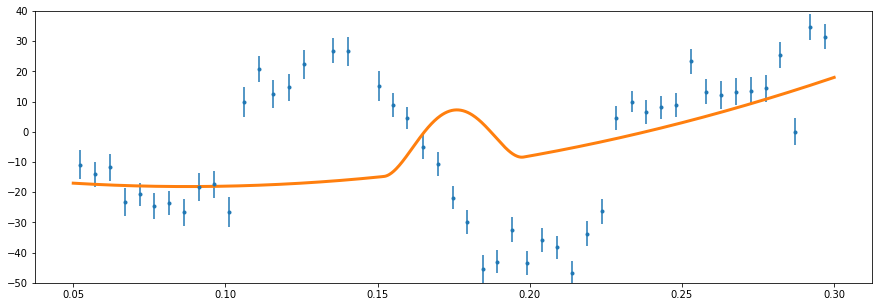

In [137]:
test = res.x + 0.0
#test[0] = 20000
test[4] = 1.0
test[5] = 0.0
rmcurve(test)
plot_rmcurve(test)

In [81]:
orbit = exo.orbits.KeplerianOrbit(period=P, a=a, t0=t0, b=0.4, ecc=e, omega=w, r_star=1.0) 

x, y, z = orbit.get_relative_position(tuse)


In [82]:
xp = x.eval()
yp = y.eval()
zp = z.eval()

In [83]:
(zp**2+yp**2+xp**2)**0.5

array([19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42,
       19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42, 19.42])

In [84]:
a

19.42

In [85]:
tuse = np.arange(-4, 4, 0.1)

f = (tuse - t0)/P*2*np.pi
I = np.arccos(b/a)


In [106]:


zpos = a*np.cos(f) 
ypos = -a*np.sin(np.pi/2+f)*np.cos(I)
xpos = a*np.sin(f)*np.sin(I)

In [108]:
zpos-zp

array([-4.10861147e-03, -4.11988110e-03, -4.10660824e-03, -4.06887196e-03,
       -4.00689705e-03, -3.92105270e-03, -3.81185031e-03, -3.67994039e-03,
       -3.52610875e-03, -3.35127177e-03, -3.15647097e-03, -2.94286680e-03,
       -2.71173171e-03, -2.46444261e-03, -2.20247260e-03, -1.92738228e-03,
       -1.64081037e-03, -1.34446401e-03, -1.04010856e-03, -7.29557091e-04,
       -4.14659590e-04, -9.72919255e-05,  2.20655316e-04,  5.37288094e-04,
        8.50720200e-04,  1.15908449e-03,  1.46054402e-03,  1.75330295e-03,
        2.03561731e-03,  2.30580532e-03,  2.56225745e-03,  2.80344598e-03,
        3.02793415e-03,  3.23438464e-03,  3.42156763e-03,  3.58836804e-03,
        3.73379223e-03,  3.85697389e-03,  3.95717923e-03,  4.03381130e-03,
        4.08641361e-03,  4.11467280e-03,  4.11842052e-03,  4.09763446e-03,
        4.05243843e-03,  3.98310167e-03,  3.89003722e-03,  3.77379949e-03,
        3.63508091e-03,  3.47470783e-03,  3.29363561e-03,  3.09294292e-03,
        2.87382531e-03,  

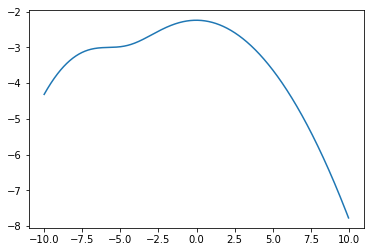

In [50]:
x = np.arange(-10, 10, 0.02)
sigma1 = 3
mu1 = 0

sigma2 = 2
mu2 = -7
g1 = 0.8/np.sqrt(2*np.pi*sigma1**2) * np.exp(-(x-mu1)**2/(2*sigma1**2))
g2 = 0.2/np.sqrt(2*np.pi*sigma2**2) * np.exp(-(x-mu2)**2/(2*sigma2**2))

plt.plot(x, np.log(g1+g2))
#plt.plot(x, g1)
#plt.plot(x, g2)


In [ ]:
var_good = (euse**2 + jitter_good**2)
var_bad  = (euse**2 + jitter_bad**2)
gooddata = -0.5*q*(np.sum((rv-vuse)**2/var_good + np.log(2*np.pi*var_good)))
baddata  = -0.5*(1-q)*(np.sum((rv-vuse)**2/var_bad + np.log(2*np.pi*var_bad)))
lnprob = gooddata + baddata
    
goodgauss = q * np.sqrt(2*np.pi*var_good) * np.exp((rv-vuse)**2/var_good)
badgauss  = (1-q) * np.sqrt(2*np.pi*var_bad) * np.exp((rv-vuse)**2/var_bad)

totgauss = np.log(goodgauss + badgauss)

